In [1]:
from nltk.tokenize import MWETokenizer
stopwords = [line.strip() for line in open('stop_words.txt', encoding='UTF-8').readlines()] #加载自定义停止词

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("convert.xlsx")


In [4]:
data

,title,author,com,public,sql,quote,download,href,ChDiv_summary,claim_text
0,纳米晶石,肖安;何振华;肖劲东;安黛宗,深圳务本材料科技有限公司,中国专利,2020-08-25,2020-12-22,下载,https://kns.cnki.net/kcms/detail/detail.aspx?d...,"本发明公开一种纳米晶石,纳米晶石材料结构为在基体内具有由开口气孔和毛细管道所构成多孔材料,相...","1.一种纳米晶石,其特征是：所述的纳米晶石材料结构为在基体内具有由开口气孔和毛细管道所构成多..."
1,利用材料物理特性对锌电积极板预开口的方法及设备,李杰,中际山河科技有限责任公司,中国专利,2020-08-25,2020-12-11,下载,https://kns.cnki.net/kcms/detail/detail.aspx?d...,本发明提供一种利用材料物理特性对锌电积极板预开口的方法及设备。利用材料物理特性对锌电积极板预...,"1.一种利用材料物理特性对锌电积极板预开口的方法,用于处理沉积有锌层的铝制阴极板,其特征在于..."
2,一种材料物理制备取样分析装置,丰远;刘慧;边健,合肥学院,中国专利,2020-04-14,2020-12-08,下载,https://kns.cnki.net/kcms/detail/detail.aspx?d...,"本实用新型属于材料分析技术领域,具体公开了一种材料物理制备取样分析装置,包括分析装置主体、支...","1.一种材料物理制备取样分析装置,包括分析装置主体(1)、支撑连接板(2)、外壳(4)和支撑..."
3,光学滤波器,馆村满幸,AGC株式会社,中国专利,2019-03-25,2020-11-17,下载,https://kns.cnki.net/kcms/detail/detail.aspx?d...,"本发明涉及一种光学滤波器(1),具备透明基板(10)以及3个以上的薄膜层叠结构体(11)、(...","1.一种光学滤波器,具备透明基板以及3个以上的薄膜层叠结构体,所述3个以上的薄膜层叠结构体分..."
4,一种材料物理电阻实验教具,高娟;孙亚娟;张洁;孙小卫,安徽理工大学,中国专利,2018-10-18,2020-10-30,下载,https://kns.cnki.net/kcms/detail/detail.aspx?d...,"本发明属于实验教具技术领域,具体涉及一种材料物理电阻实验教具,包括电阻组件,电阻组件包括卷筒...","1.一种材料物理电阻实验教具,其特征在于：包括电阻组件(10),电阻组件(10)包括卷筒(1..."
...,...,...,...,...,...,...,...,...,...,...
111633,高效太阳能电池,赖志勤,赖志勤,中国专利,1987-08-07,1989-02-15,下载,https://kns.cnki.net/kcms/detail/detail.aspx?d...,本发明涉及的是一种新型结构的高效太阳能电池。$本发明的新型结构太阳能电池是利用太阳光激发PN...,"一种高效太阳光发电装置,它由透明导电层、P＊结层、背板\r\n\r\n\r\n\r\n电极层..."
111634,具有多层薄膜迭合的半导体层的薄膜光电电动势元件,中川克已;清水勇,佳能株式会社,中国专利,1988-03-28,1988-10-05,下载,https://kns.cnki.net/kcms/detail/detail.aspx?d...,改进的针型和肖特基型薄膜光电电动势元件具有令人满意的短路电流(Isc)、开路电压(Voc)、...,"一种改进的薄膜光电电动势元件,其特征在于,N型和P型半\r\n\r\n\r\n\r\n导体层..."
111635,太阳电池组件,竹贞哉,夏普公司,中国专利,1985-04-01,1987-11-11,下载,https://kns.cnki.net/kcms/detail/detail.aspx?d...,"在埋设太阳电池单体的树脂背面,覆盖着防潮湿用的金属箔薄膜,并设有电动势输出框架,该框架和上述...","1、一种太阳电池组件,包括具有受光面的受光板,至少一个以上的太阳电池单体;将上述太阳电池单体..."
111636,太阳电池组件,竹冈贞哉,夏普公司,中国专利,1985-04-01,1987-11-11,下载,https://kns.cnki.net/kcms/detail/detail.aspx?d...,"在埋设太阳电池单体的树脂背面,覆盖着防潮湿用的金属箔薄膜,并设有电动势输出框架.该框架和上述...","太阳电池组件,其特征在于,在埋设太阳电池单体的树脂背面\r\n\r\n\r\n\r\n,复盖..."


In [5]:
summary = data['ChDiv_summary']
summary

0         本发明公开一种纳米晶石,纳米晶石材料结构为在基体内具有由开口气孔和毛细管道所构成多孔材料,相...
1         本发明提供一种利用材料物理特性对锌电积极板预开口的方法及设备。利用材料物理特性对锌电积极板预...
2         本实用新型属于材料分析技术领域,具体公开了一种材料物理制备取样分析装置,包括分析装置主体、支...
3         本发明涉及一种光学滤波器(1),具备透明基板(10)以及3个以上的薄膜层叠结构体(11)、(...
4         本发明属于实验教具技术领域,具体涉及一种材料物理电阻实验教具,包括电阻组件,电阻组件包括卷筒...
                                ...                        
111633    本发明涉及的是一种新型结构的高效太阳能电池。$本发明的新型结构太阳能电池是利用太阳光激发PN...
111634    改进的针型和肖特基型薄膜光电电动势元件具有令人满意的短路电流(Isc)、开路电压(Voc)、...
111635    在埋设太阳电池单体的树脂背面,覆盖着防潮湿用的金属箔薄膜,并设有电动势输出框架,该框架和上述...
111636    在埋设太阳电池单体的树脂背面,覆盖着防潮湿用的金属箔薄膜,并设有电动势输出框架.该框架和上述...
111637    一种太阳能重复发电的方法与装置,其特点是首先利用太阳能电池进行直接光电转换,然后利用半导体温...
Name: ChDiv_summary, Length: 111638, dtype: object

In [6]:
summary1 = ("".join(i for i in summary.astype(str)))

In [7]:
from nltk.tokenize import MWETokenizer
stopwords = [line.strip() for line in open('stop_words.txt', encoding='UTF-8').readlines()] #加载自定义停止词

In [8]:
import jieba.analyse
import pkuseg
import nltk

sentence=str()

# document_cut = jieba.cut(summary1)
tokenizer = MWETokenizer([('solar', 'cell')], separator = '_')
# seg = pkuseg.pkuseg(user_dict = "userdict.txt")
text=tokenizer.tokenize(nltk.word_tokenize(summary1))
result = ' '.join(text)
for word in result:
    if word not in stopwords:
        if word != "\t":
            sentence += word

with open('0828.txt', 'w',encoding="utf-8") as f2:
    f2.write(sentence)

In [9]:
# jieba slow
# import jieba.analyse
# import pkuseg
# import nltk

# sentence=str()

# document_cut = jieba.cut(summary1)
# tokenizer = MWETokenizer([('solar', 'cell')], separator = '_')
# # seg = pkuseg.pkuseg(user_dict = "userdict.txt")
# # text=tokenizer.tokenize(nltk.word_tokenize(summary1))
# result = ' '.join(document_cut)
# for word in result:
#     if word not in stopwords:
#         if word != "\t":
#             sentence += word

# with open('jieba-tokenized.txt', 'w',encoding="utf-8") as f2:
#     f2.write(sentence)

In [2]:
#加载语料
from gensim.models import word2vec, KeyedVectors,Word2Vec
sentences = word2vec.LineSentence('jieba-tokenized.txt') #正式训练前的格式化

In [3]:
#训练语料

model = word2vec.Word2Vec(sentences,sg=1, hs=0,min_count=1,window=10,vector_size=100)


In [4]:
model.wv.save_word2vec_format(r"jieba-model.bin") #保存模型

In [5]:
# model = gensim.models.Word2Vec.load('word2vec0828b.bin') #加载模型
model = KeyedVectors.load_word2vec_format(r"jieba-model.bin" ,binary= False) 

In [6]:
from sklearn.decomposition import PCA



[[-1.1870403  -1.0112125 ]
 [-1.3130176   0.54661727]
 [-1.0837835  -0.8510421 ]
 [ 1.6440166  -0.09711074]
 [-0.03639719  2.005958  ]
 [ 1.976222   -0.59321   ]]


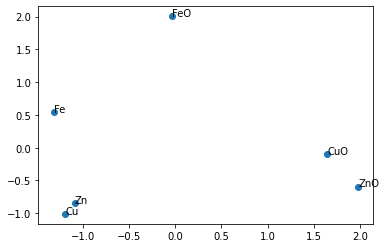

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(model['Cu','Fe','Zn','CuO','FeO','ZnO']) #选择词
pca = PCA(n_components=2) #选择需要降成的维度
Y = pca.fit_transform(X) #将100维词向量降维成2维

print(Y)
txt = ['Cu','Fe','Zn','CuO','FeO','ZnO','光伏'] #图中每个点的标注

x = Y[:,0] #图中每个点的横坐标

y = Y[:,1] #图中每个点的纵坐标

plt.scatter(x, y)
for i in range(len(x)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i]+0.001, y[i]+0.001)) #使用matplotlib在图中画出每个点

plt.show()

[[-2.3817213   1.3638877 ]
 [ 0.9731223  -1.2566364 ]
 [ 0.88634205  0.52282524]
 [ 2.7697527   2.079913  ]
 [ 0.4146901  -0.7121198 ]
 [ 0.5465214  -1.530956  ]
 [ 1.8812617  -0.24345799]
 [-1.7250211  -0.80654675]
 [-1.3046885  -0.4671408 ]
 [-2.0602593   1.0502313 ]]


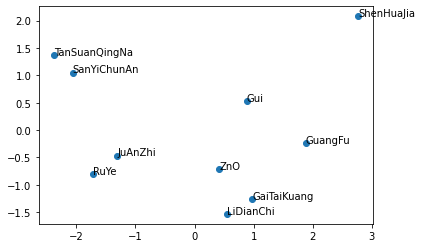

In [22]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(model['碳酸氢钠','钙钛矿','硅','砷化镓','ZnO','锂电池','光伏','乳液','聚氨酯','三乙醇胺']) #选择词
pca = PCA(n_components=2) #选择需要降成的维度
Y = pca.fit_transform(X) #将100维词向量降维成2维

print(Y)
txt = ['TanSuanQingNa','GaiTaiKuang','Gui','ShenHuaJia','ZnO','LiDianChi','GuangFu','RuYe','JuAnZhi','SanYiChunAn'] #图中每个点的标注

x = Y[:,0] #图中每个点的横坐标

y = Y[:,1] #图中每个点的纵坐标

plt.scatter(x, y)
for i in range(len(x)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i]+0.001, y[i]+0.001)) #使用matplotlib在图中画出每个点

plt.show()

In [ ]:
# DBSCAN, PCA